# Projeto 2 de Ciência dos dados

Integrantes:
- André Faia
- Alex Steijntjes
- Pedro Tibério

# Introdução

Foi escolhido para o estudo do projeto 2, um tema para avaliar a qualidade de um vinho baseado em suas características, deste modo selecionamos um dataframe já disponível no site Keagle e assim analisamos os fatores.

# Técnicas utilizadas

Classificação Arvore de decisões e regressão linear múltipla.

# Projeto:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Explicação sobre as bibliotecas importadas:
- Pandas - Biblioteca para manipulação e análise de dados;
- Numpy - Biblioteca para realizar cálculos em Arrays Multidimensionais;
- Matplotlib.pyplot - Biblioteca para gerar gráficos;
- Seaborn - Biblioteca para visualização de dados baseado em Matplotlib;
- Sklearn - Biblioteca com ferramentas eficientes para análise preditiva de dados;

In [2]:
data = pd.read_excel("VINHO.xlsx")

In [3]:
data.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [4]:
data_filtrado = data.loc[:,["volatile acidity","citric acid", "residual sugar", "chlorides", "total sulfur dioxide", "density", "pH", "sulphates","alcohol","quality","target"]]

In [5]:
data_filtrado.head()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5,0
1,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5,0
2,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5,0
3,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6,1
4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5,0


In [6]:
data_1 = data.loc[data['target']==1]
data_1

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
7,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,1
8,8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,1
16,16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7,1
19,19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,1592,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1593,1593,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1595,1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1


In [7]:
data_0 = data.loc[data['target']==0]
data_0

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
5,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5,0
1583,1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5,0
1589,1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5,0
1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0


C:\Users\andre\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\andre\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


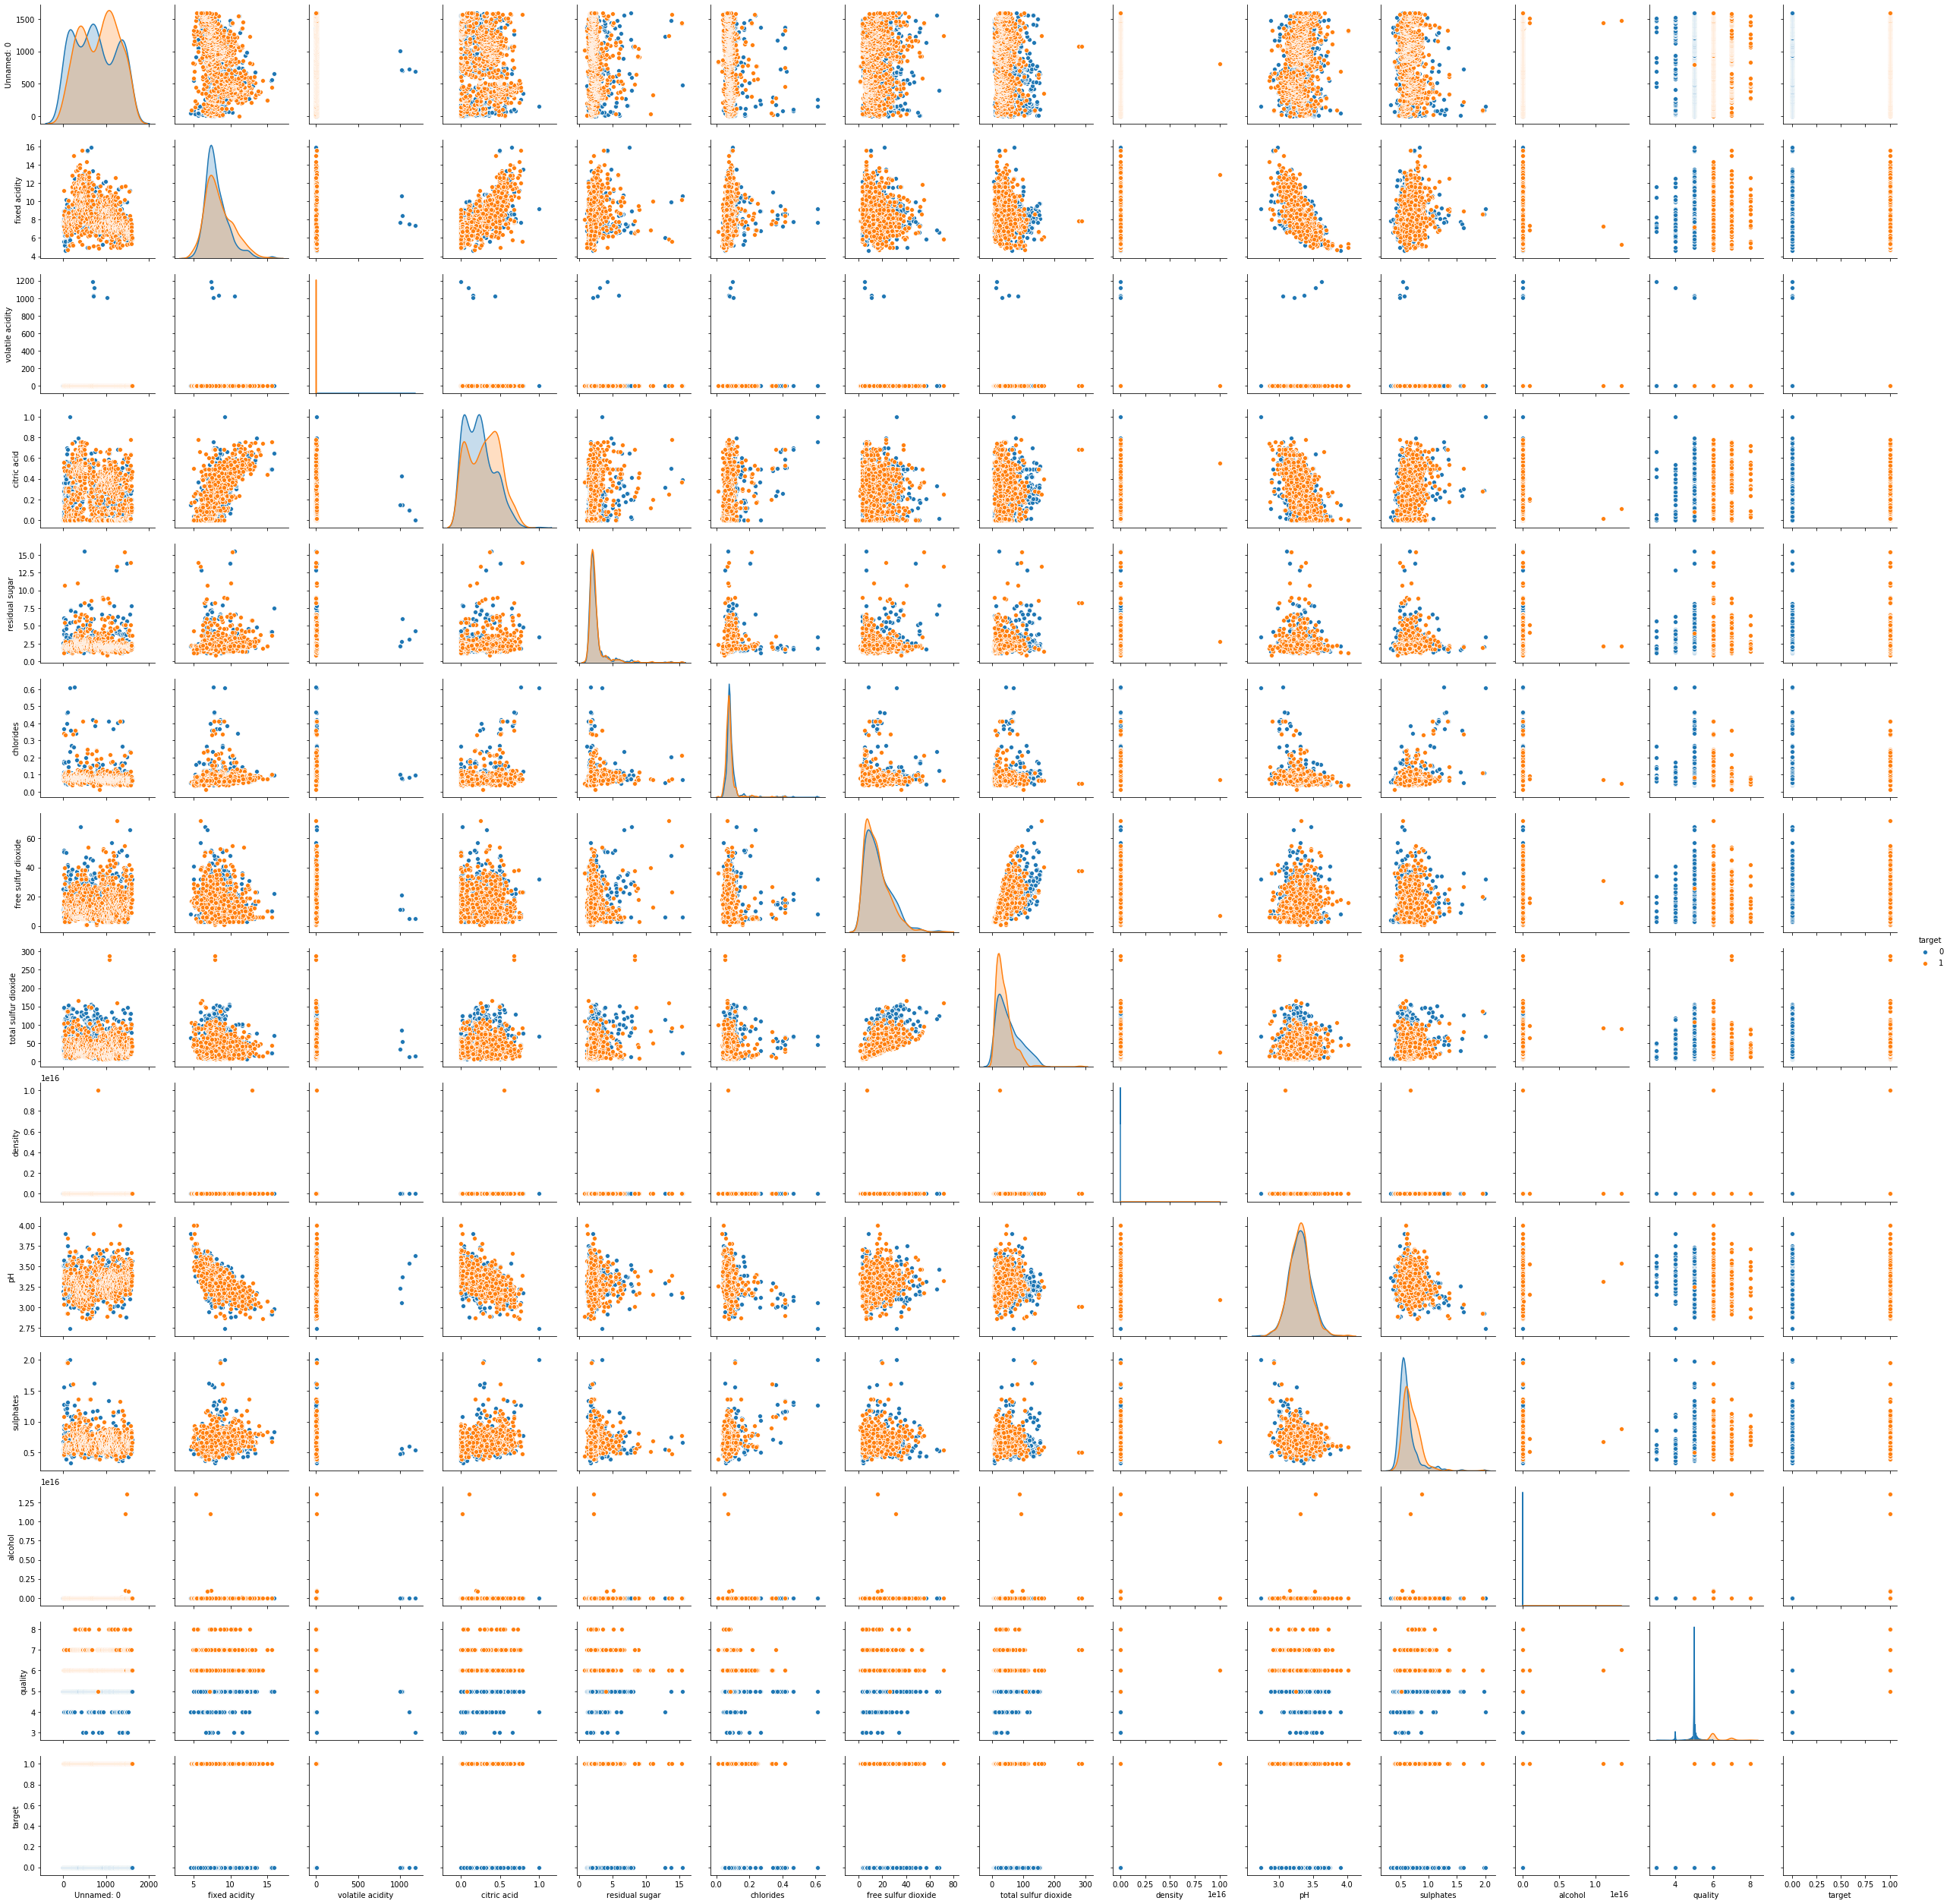

In [8]:
sns.pairplot(data, hue="target")

Análise da correlação utilizando como objeto de estudo a qualidade dos vinhos.

# Modelo 1

Árvore de decisões:

O modelo de árvore de decisões é um modelo de predição inspirada em um brainstorm, o qual permite a visualização dos dados do dataframe, de acordo com certos atributos. Este modelo, disponibiliza infinitas ramificações, e em cada uma delas é feita uma decisão distinta.

In [9]:
lista_colunas = ["volatile acidity","citric acid", "residual sugar", "chlorides", "total sulfur dioxide", "density", "pH", "sulphates","alcohol","quality"]

X = data_filtrado[lista_colunas] 

Y = data_filtrado.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [10]:
X_train

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
126,1.330,0.00,1.7,0.081,12.0,0.99640,3.53,0.49,10.9,5
810,0.490,0.10,2.6,0.068,14.0,0.99562,3.30,0.47,10.5,5
635,0.840,0.00,1.4,0.065,33.0,0.99540,3.27,0.55,9.7,5
598,0.585,0.18,2.1,0.078,30.0,0.99670,3.20,0.48,9.8,6
880,0.560,0.18,1.6,0.078,21.0,0.99576,3.15,0.49,9.9,5
...,...,...,...,...,...,...,...,...,...,...
715,0.490,0.18,2.7,0.069,34.0,0.99670,3.29,0.48,9.2,6
905,0.580,0.20,3.0,0.081,115.0,0.99800,3.23,0.59,9.5,5
1096,0.725,0.09,5.5,0.117,17.0,0.99655,3.35,0.49,10.8,6
235,0.630,0.00,1.9,0.097,38.0,0.99675,3.37,0.58,9.0,6


In [11]:
X_test

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,0.41,0.64,2.2,0.093,42.0,0.99860,3.54,0.66,10.5,5
1283,0.63,0.28,2.7,0.096,69.0,0.99734,3.26,0.63,10.2,6
408,0.34,0.58,3.7,0.174,16.0,0.99700,3.19,0.70,11.3,6
1281,0.46,0.20,1.9,0.077,54.0,0.99560,3.37,0.64,10.4,6
1118,0.39,0.12,2.1,0.065,24.0,0.99252,3.30,0.53,13.3,6
...,...,...,...,...,...,...,...,...,...,...
1596,0.51,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
985,0.58,0.00,2.0,0.064,11.0,0.99562,3.45,0.58,11.3,6
671,0.73,0.21,1.7,0.074,13.0,0.99680,3.20,0.52,9.5,5
1379,0.57,0.02,2.6,0.077,35.0,0.99557,3.36,0.62,10.8,6


In [12]:
Y_train

126     0
810     0
635     0
598     1
880     0
       ..
715     1
905     0
1096    1
235     1
1061    1
Name: target, Length: 1119, dtype: int64

In [13]:
Y_test

75      0
1283    1
408     1
1281    1
1118    1
       ..
1596    1
985     1
671     0
1379    1
1169    1
Name: target, Length: 480, dtype: int64

In [14]:
tree = DecisionTreeClassifier(criterion="entropy")

tree = tree.fit(X_train,Y_train)

Y_pred = tree.predict(X_test)

print("Precisão de:",metrics.accuracy_score(Y_test, Y_pred))

Precisão de: 0.9979166666666667


# Modelo 2

Regressão linear múltipla:

Por se tratar de um dataframe com mais de uma variável, optamos por utilizar a regressão linear múltipla como segundo modelo, uma vez que a mesma é utlizada para relacionar diferentes variáveis explicativas, o que se encaixa perfeitamente no nosso caso, onde cada característica analisada sobre o vinho pode ser considerada uma variável.

In [15]:
passo_inicial = PolynomialFeatures(degree=7)
 
X1 = data_filtrado.quality.to_numpy().reshape(len(data_filtrado.quality.to_numpy()), 1) 
Y1 = data_filtrado.pH.to_numpy().reshape(len(data_filtrado.quality.to_numpy()), 1) 

polinomial_X1 = passo_inicial.fit_transform(X1)

polinomial_X1

array([[1.00000e+00, 5.00000e+00, 2.50000e+01, ..., 3.12500e+03,
        1.56250e+04, 7.81250e+04],
       [1.00000e+00, 5.00000e+00, 2.50000e+01, ..., 3.12500e+03,
        1.56250e+04, 7.81250e+04],
       [1.00000e+00, 5.00000e+00, 2.50000e+01, ..., 3.12500e+03,
        1.56250e+04, 7.81250e+04],
       ...,
       [1.00000e+00, 6.00000e+00, 3.60000e+01, ..., 7.77600e+03,
        4.66560e+04, 2.79936e+05],
       [1.00000e+00, 5.00000e+00, 2.50000e+01, ..., 3.12500e+03,
        1.56250e+04, 7.81250e+04],
       [1.00000e+00, 6.00000e+00, 3.60000e+01, ..., 7.77600e+03,
        4.66560e+04, 2.79936e+05]])

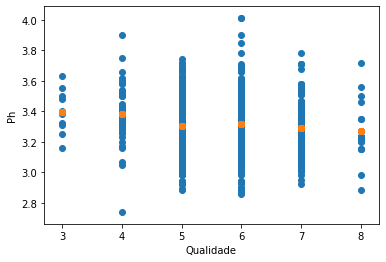

In [24]:
modelo_inicial = LinearRegression()

modelo_inicial.fit(polinomial_X1, Y1) 

Y_pred2 = modelo_inicial.predict(polinomial_X1) 

plt.scatter(X1, Y1)
plt.xlabel("Qualidade")
plt.ylabel("Ph")
plt.scatter(X1, Y_pred2)

In [25]:
primeiro_erro = (mean_squared_error(Y1, Y_pred2))**0.5

media_Y1 = [Y1.mean()]*len(Y1)

r2 = 1 - (mean_squared_error(Y1, Y_pred2) / mean_squared_error(Y1, media_Y1))

print("Obtivemos um RMS de Treinamento de valor: {0:.5}%".format(primeiro_erro))
print("Obtivemos um R² (Coeficiente de Determinação) de Valor: {0:.5}".format(r2))

Obtivemos um RMS de Treinamento de valor: 0.1533%
Obtivemos um R² (Coeficiente de Determinação) de Valor: 0.013444


# Conclusão

   A partir da análise do primeiro modelo (Árvore de decisões) pudemos perceber que a variável de estudo que escolhemos comparar com a coluna target que criamos teve uma precisão muito elevada, isso pois a coluna target foi criada utilizando como parâmetro a própria variável de estudo qualidade, dessa forma podemos perceber que o nosso primeiro modelo gerou uma precisão de 0.9979166666666667 um valor muito próximo de 100%, mostrando que os parâmetros estão condizentes e de acordo com o que esperávamos, podemos ainda dizer que o modelo foi de certa forma comprovado, pois um retorno tão alto significa uma precisão muito grande. Devemos isso à coluna qualidade, que de certa forma já fazia um pré julgamento sobre o vinho ser bom ou não, e talvez utilizando alguma outra variável ou algum outro parâmetro poderia dar uma precisão mais baixa e portanto uma possibilidade de erro mais alta.
   Já no segundo modelo, para o calculo do Coeficiente de determinação (R²) obtivemos o valor de 0,013444, tal fator indica que a variabilidade alcançada foi baixa e que geramos uma precisão alta de nosso modelo, fazendo com que possamos de certa forma confiar no nosso modelo para análises precisas.
Já o Root Mean Square (RMS), calcula a raiz quadrada da média dos valores ao quadrado, indicando assim a taxa de erro do modelo, quanto mais próxima de 0, melhor, como obtivemos um valor de 0,1533%, geramos um ótimo resultado. E novamente podemos dizer que nosso modelo teve uma precisão muito alta mostrando que tanto a escolha dos modelos quanto a escolha das variáveis para análise foram bem definidas.